## Dataset Details

This dataset is formed from three different data sources used in the **ChatDoctor** project:

### Sources:
- **HealthCareMagic-100k**: 100,000 real conversations between patients and doctors from [HealthCareMagic.com](https://www.healthcaremagic.com/) 
- **iCliniq-10k**: 10,000 real conversations between patients and doctors from [iCliniq.com](https://www.icliniq.com/)
- **GenMedGPT-5k**: 5,000 generated conversations between patients and physicians from ChatGPT and a disease database 
  *(This dataset was not included due to being AI-generated. However, it can be manually added if desired.)*

### Dataset Link:
[Hugging Face Repository](https://huggingface.co/datasets/avaliev/chat_doctor?row=99)

---

## Sample Data:

```json
{
  "instruction": "If you are a doctor, please answer the medical questions based on the patient's description.",
  "input": "I woke up this morning feeling the whole room is spinning when I was sitting down. I went to the bathroom walking unsteadily, as I tried to focus I felt nauseous. I tried to vomit but it wouldn’t come out. After taking Panadol and sleeping for a few hours, I still feel the same. By the way, if I lay down or sit down, my head does not spin—only when I move around do I feel the whole world spinning. And is it normal to have stomach discomfort at the same time? Earlier, after I relieved myself, the spinning lessened, so I am not sure whether it's connected or just a coincidence. Thank you, doc!",
  "output": "Hi, Thank you for posting your query. The most likely cause of your symptoms is **Benign Paroxysmal Positional Vertigo (BPPV)**, a type of peripheral vertigo. The most common symptom is dizziness or giddiness, which worsens with movement. Accompanying nausea and vomiting are common. The condition is due to a problem in the ear and usually improves on its own within a few days. **Betahistine tablets** may help relieve your symptoms. Performing **vestibular rehabilitation** or adaptation exercises can prevent recurrence. An **ENT evaluation** is also recommended. I hope this helps. Best wishes, *Chat Doctor*."
}


In [1]:
!pip install -U langchain langchain-community faiss-cpu datasets sentence-transformers transformers accelerate torch torchvision torchaudio
!pip install bitsandbytes peft
!pip install gradio --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 60.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 108.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB

### Huggingface Login using HF Token

In [ ]:
import os
os.environ["HUGGINGFACE_TOKEN"] = "yourHFtoken"
!huggingface-cli login --token $HUGGINGFACE_TOKEN


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `mytoken` has been saved to /Users/moossa/.cache/huggingface/stored_tokens
Your token has been saved to /Users/moossa/.cache/huggingface/token
Login successful.
The current active token is: `mytoken`


### 1. Exploratory Data Analysis (EDA)

 Loading dataset...


README.md:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

train.json:   0%|          | 0.00/120M [00:00<?, ?B/s]

validation.json:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/95588 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11949 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11949 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


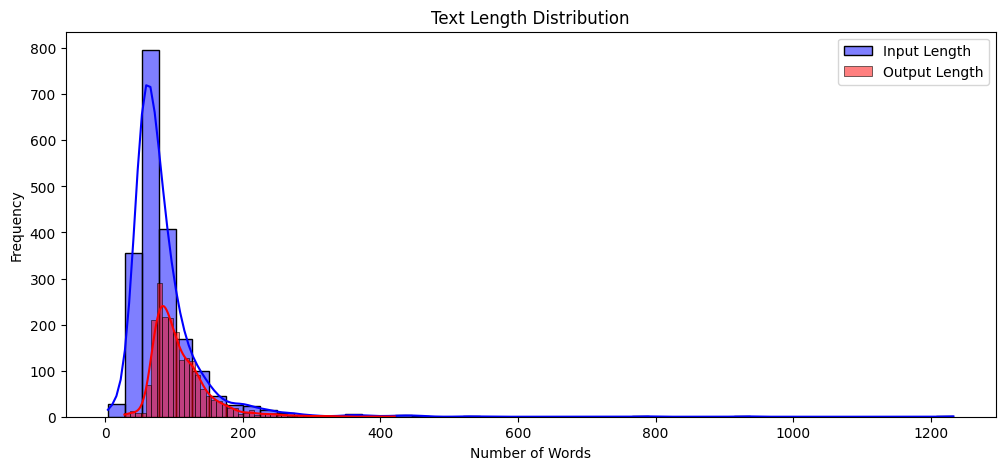

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


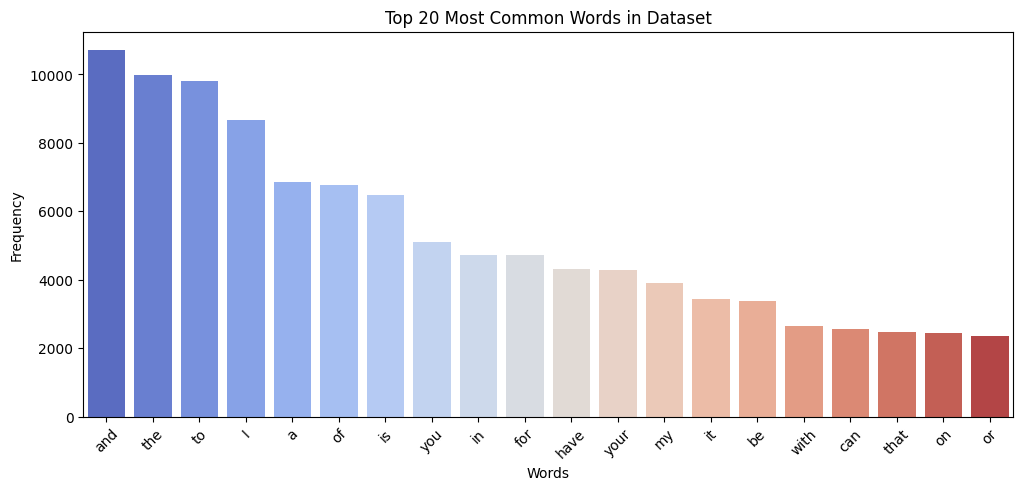

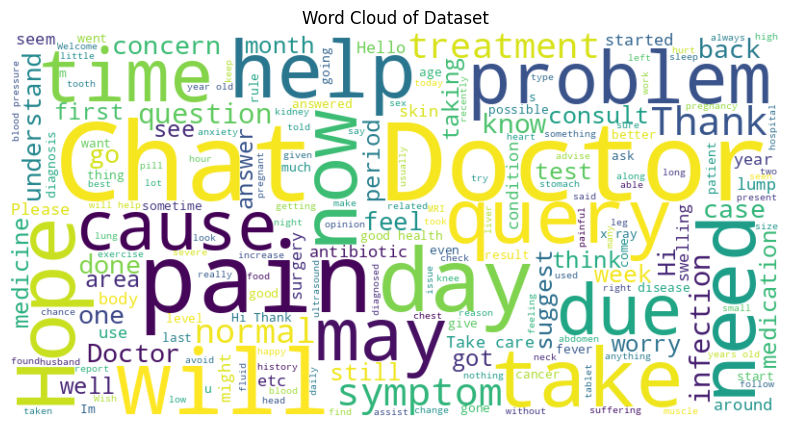


 Generating text embeddings for visualization...


<ipython-input-3-932457cda2fb>:77: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

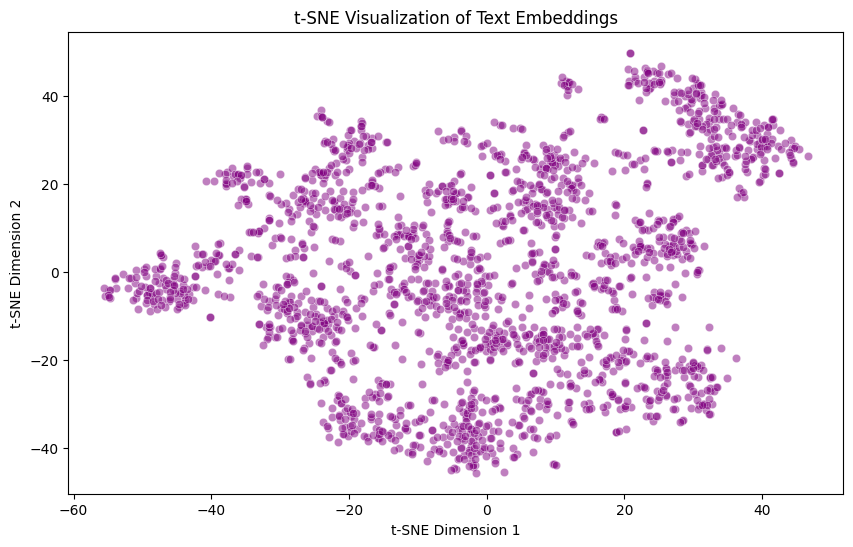


 EDA Completed!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from datasets import load_dataset
import numpy as np
from sklearn.manifold import TSNE
from langchain_community.embeddings import HuggingFaceEmbeddings

def exploratory_data_analysis():

    """
    Performs exploratory data analysis (EDA) on the "Chat Doctor" dataset.

    This function loads the dataset, visualizes text length distributions, 
    analyzes word frequencies, generates a word cloud, and performs t-SNE 
    visualization of text embeddings.

    Steps:
    1. Loads and samples 2,000 rows for efficient visualization.
    2. Computes text length distributions and plots histograms.
    3. Analyzes word frequencies and visualizes the top 20 most common words.
    4. Generates a word cloud from the dataset.
    5. Generates sentence embeddings using a pre-trained MiniLM model.
    6. Applies t-SNE dimensionality reduction to visualize embeddings.

    Returns:
        None: Displays multiple plots and prints EDA completion message.
    """
    
    print(" Loading dataset...")
    dataset = load_dataset("avaliev/chat_doctor")
    df = pd.DataFrame(dataset["train"])

    # Sample Data (Only 2K rows for efficiency in visualization)
    df = df.sample(n=2000, random_state=42)
    df["combined_text"] = df["input"] + " " + df["output"]

    # Word count distributions
    df["input_length"] = df["input"].apply(lambda x: len(str(x).split()))
    df["output_length"] = df["output"].apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(12, 5))
    sns.histplot(df["input_length"], bins=50, kde=True, color="blue", label="Input Length")
    sns.histplot(df["output_length"], bins=50, kde=True, color="red", label="Output Length")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.title("Text Length Distribution")
    plt.legend()
    plt.show()

    # Word frequency analysis
    all_words = " ".join(df["combined_text"].astype(str))
    word_counts = Counter(all_words.split())
    common_words = word_counts.most_common(20)

    words, counts = zip(*common_words)
    plt.figure(figsize=(12, 5))
    sns.barplot(x=list(words), y=list(counts), palette="coolwarm")
    plt.xticks(rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 20 Most Common Words in Dataset")
    plt.show()

    # Generate a Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Dataset")
    plt.show()

    # Generate Embeddings for Visualization
    print("\n Generating text embeddings for visualization...")
    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    embeddings = embed_model.embed_documents(df["combined_text"].tolist())

    # Convert list of embeddings to NumPy array for t-SNE
    embeddings_array = np.array(embeddings)

    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(embeddings_array)

    # Plot t-SNE results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], alpha=0.5, color="purple")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("t-SNE Visualization of Text Embeddings")
    plt.show()

    print("\n EDA Completed!")

exploratory_data_analysis()


# Explanation of the t-SNE Plot

## What This t-SNE Plot Represents

- Each **point** represents a **medical QA pair** (question + answer).
- **Closer points** indicate **semantic similarity**, meaning the medical questions or answers are related.
- **Farther apart points** belong to **different topics or clusters**.

---

## Key Observations from the t-SNE Plot

### 1. Presence of Visible Clusters  
- **Certain medical topics naturally group together.**  
- Similar questions (e.g., related to **diabetes, hypertension, or respiratory diseases**) form clusters with similar embeddings.

### 2. Variation in Density  
- **Densely packed regions** → Frequently occurring medical topics in your dataset.  
- **Loosely packed or isolated points** → Rare or outlier topics that don’t fit well with others.

### 3. No Clear Separation of Distinct Groups  
- **t-SNE works well in high-dimensional spaces**, but its projections aren’t always perfectly separable.  
- This suggests a **mix of overlapping medical topics** rather than strictly distinct categories.



### 2. Fine-tuning pre-trained model (t5-small)

In [4]:
import torch
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer, DataCollatorForSeq2Seq

def fine_tune_t5():
    """
    Fine-tunes the T5 model on the ChatDoctor dataset.
    
    Loads the dataset, preprocesses it, tokenizes input-output pairs,
    and fine-tunes the T5 model using the Trainer API. 
    The fine-tuned model is saved to disk.
    
    Returns:
        tuple: (fine-tuned model, Trainer object, tokenizer)
    """
    
    print(" Loading dataset...")
    dataset = load_dataset("avaliev/chat_doctor")

    # Sample only 10,000 records for training - not anymore
    dataset["train"] = dataset["train"] 

    # Load Tokenizer for T5
    model_name = "t5-small"  # Use a much smaller model
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Set padding token
    tokenizer.pad_token = tokenizer.eos_token  # Use EOS token as PAD token
    print("Pad token set")

    def tokenize_function(examples):
        """ Tokenizes input-output pairs correctly for instruction-based training. """
        
        # Ensure instruction is included
        inputs = [f"Instruction: {instr} Question: {inp}" for instr, inp in zip(examples["instruction"], examples["input"])]
        outputs = [f"{out}" for out in examples["output"]]
    
        # Tokenize inputs and outputs separately
        model_inputs = tokenizer(inputs, padding="max_length", truncation=True, max_length=512)
        labels = tokenizer(outputs, padding="max_length", truncation=True, max_length=512)
    
        # Ensure labels are correctly assigned
        model_inputs["labels"] = labels["input_ids"]
        
        return model_inputs



    print(" Tokenizing dataset...")
    tokenized_dataset = dataset.map(tokenize_function, batched=True)

    #  Load T5 Model
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    print(" Model loaded")

    #  Training Arguments
    training_args = TrainingArguments(
        output_dir="./fine_tuned_t5",
        evaluation_strategy="epoch",
        per_device_train_batch_size=8,  #  Larger batch size since T5 is small
        per_device_eval_batch_size=8,
        num_train_epochs=3,  #  More epochs since training is faster
        save_strategy="epoch",
        logging_dir="./logs",
        logging_steps=500,
        report_to="tensorboard"
    )

    print(" Training arguments set")

    #  Data Collator (Handles Padding)
    data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

    #  Trainer Setup
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["test"],
        tokenizer=tokenizer,
        data_collator=data_collator
    )

    print(" Starting fine-tuning...")
    trainer.train()

    return model, trainer, tokenizer


### 3. Track Loss and Accuracy using Tensor Board

In [5]:
import os
from torch.utils.tensorboard import SummaryWriter

def track_training(trainer):
    """
    Logs training and evaluation loss metrics to TensorBoard.

    This function extracts training and evaluation loss from the `trainer` object
    and logs them into TensorBoard for visualization.

    Steps:
    1. Creates a log directory (`./logs`) if it doesn't exist.
    2. Iterates through the `trainer.state.log_history` to extract loss metrics.
    3. Logs `train_loss` and `eval_loss` to TensorBoard.
    4. Closes the TensorBoard writer after logging.

    Args:
        trainer (transformers.Trainer): The Hugging Face `Trainer` instance that stores
            training and evaluation metrics.

    Returns:
        None: Logs the metrics to TensorBoard and prints a confirmation message.

    Example:
        ```python
        track_training(trainer)
        ```
    """
    
    log_dir = "./logs"
    os.makedirs(log_dir, exist_ok=True)

    writer = SummaryWriter(log_dir)

    for epoch, metrics in enumerate(trainer.state.log_history):
        if "loss" in metrics:
            writer.add_scalar("Loss/train", metrics["loss"], epoch)
        if "eval_loss" in metrics:
            writer.add_scalar("Loss/eval", metrics["eval_loss"], epoch)

    writer.close()
    print("Training progress logged in TensorBoard!")



### 4. Evaluate the fine-tuned model test data

In [6]:
import numpy as np

def evaluate_model(model, trainer, tokenizer, dataset):

    """
    Evaluates the fine-tuned T5 model on a test dataset.

    This function tokenizes the dataset, prepares the `decoder_input_ids`
    required for T5 models, and evaluates the model using the Hugging Face `Trainer`.

    Steps:
    1. Preprocesses input and output pairs into a structured format.
    2. Tokenizes the dataset with padding and truncation.
    3. Adds `decoder_input_ids` to match T5's expected input format.
    4. Uses the `Trainer` to evaluate the model on the test set.
    5. Prints and returns evaluation metrics.

    Args:
        model (transformers.PreTrainedModel): The fine-tuned model to be evaluated.
        trainer (transformers.Trainer): The Hugging Face Trainer instance for evaluation.
        tokenizer (transformers.PreTrainedTokenizer): Tokenizer corresponding to the model.
        dataset (datasets.DatasetDict): Dataset containing a "test" split.

    Returns:
        dict: A dictionary containing evaluation metrics such as `eval_loss`.

    Example:
        ```python
        dataset = load_dataset("avaliev/chat_doctor")
        metrics = evaluate_model(model, trainer, tokenizer, dataset)
        ```
    """
    
    print(" Evaluating the fine-tuned model...")

    # Create `decoder_input_ids` dynamically
    def preprocess_function(examples):
        combined_texts = [f"question: {inp} answer: {out}" for inp, out in zip(examples["input"], examples["output"])]
        tokenized = tokenizer(combined_texts, padding="max_length", truncation=True, max_length=512)

        # Add `decoder_input_ids` to match T5 structure
        tokenized["labels"] = tokenized["input_ids"].copy()
        tokenized["decoder_input_ids"] = tokenizer(["answer: " + out for out in examples["output"]], 
                                                   padding="max_length", truncation=True, max_length=512)["input_ids"]
        
        return tokenized

    # Apply Tokenization on the Test Set
    tokenized_test = dataset["test"].map(preprocess_function, batched=True)

    # Evaluate Model
    metrics = trainer.evaluate(tokenized_test)
    print(f" Evaluation Metrics: {metrics}")

    return metrics


### 5. Make Prediction

In [7]:
def generate_predictions(model, tokenizer, input_text):
    """
    Generates a medical response using the fine-tuned T5 model.
    
    Args:
        model (AutoModelForSeq2SeqLM): The fine-tuned T5 model.
        tokenizer (AutoTokenizer): The tokenizer corresponding to the model.
        input_text (str): The medical question provided by the user.
    
    Returns:
        str: The generated response from the model.
    """

    # Structured input format
    formatted_input = f"Instruction: If you are a doctor, please answer the medical questions based on the patient's description.\n\nQuestion: {input_text}\n\nAnswer:"

    # Tokenize input
    inputs = tokenizer(formatted_input, return_tensors="pt", padding=True, truncation=True, max_length=512).to("cuda")

    # Generate response with better control
    output_ids = model.generate(
        **inputs,
        max_length=100,  #  Increased length to prevent truncation
        min_length=30,  #  Ensures full response
        num_beams=6,  # Increased for better diversity
        no_repeat_ngram_size=4,  #  Prevents repeating 4-word phrases
        repetition_penalty=2.3,  # Stricter repetition control
        early_stopping=True,  #  Stops at natural end
        temperature=0.5,  #  Slight randomness for better flow
        top_k=40,  #  Keeps diversity but prevents random noise
        top_p=0.85,  # Nucleus sampling for more controlled output
        length_penalty=0.9  # Avoids cutting off responses too soon
    )

    response = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    
    return response


### Deploy the model as a RAG application

In [25]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
import pandas as pd
from datasets import load_dataset
import torch

def deploy_fine_tuned_model():
    """
    Deploys the fine-tuned T5 model as a RAG-based chatbot using FAISS for document retrieval.

    This function:
    - Loads a fine-tuned T5 model and tokenizer.
    - Loads the `chat_doctor` dataset and preprocesses it.
    - Generates text embeddings using SentenceTransformers.
    - Stores embeddings in a FAISS vector store for retrieval.
    - Builds a retrieval-based chatbot that fetches relevant documents and generates answers.

    Returns:
        function: A `medical_qa_bot(question)` function that takes user input, retrieves context, and generates responses.

    Example:
        ```python
        chatbot = deploy_fine_tuned_model()
        response = chatbot("What are the symptoms of diabetes?")
        print(response)
        ```
    """
    
    print(" Loading fine-tuned model for deployment...")
    model_path = "/kaggle/working/fine_tuned_chat_doctor"  

    # Load Fine-Tuned Model & Tokenizer
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    print("Model and tokenizer loaded!")

    # Reload dataset (Fixes `df` error)
    dataset = load_dataset("avaliev/chat_doctor")
    df = pd.DataFrame(dataset["train"])

    #  Combine input and output for FAISS
    df["combined_text"] = df["input"] + " " + df["output"]

    # Load FAISS Embeddings
    print(" Loading FAISS Embeddings...")
    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

    #  Compute embeddings for FAISS
    print(" Computing embeddings for FAISS...")
    vectorstore = FAISS.from_texts(df["combined_text"].tolist(), embed_model)

    # Save & Load FAISS Index
    vectorstore.save_local("faiss_index")
    print(" FAISS index saved successfully!")

    print(" Loading FAISS Vector Store...")
    vectorstore = FAISS.load_local("faiss_index", embed_model, allow_dangerous_deserialization=True)

    retriever = vectorstore.as_retriever()

    # Define Custom Medical QA Function
    def medical_qa_bot(question):
        """
        Retrieves relevant documents from FAISS and generates an answer using the fine-tuned model.

        Args:
            question (str): The user's medical query.

        Returns:
            str: The AI-generated medical response.

        Example:
            ```python
            response = medical_qa_bot("What are the symptoms of diabetes?")
            print(response)
            ```
        """
        # Retrieve similar text from FAISS
        docs = retriever.get_relevant_documents(question)
        context = " ".join([doc.page_content for doc in docs])

        # Format input for the model
        formatted_question = f"{context}\n\nQuestion: {question}\n\nAnswer:"

        # Generate response using fine-tuned model
        response = generate_predictions(model, tokenizer, formatted_question)

        return response

    print(" Model deployed successfully! Ready to chat.")
    return medical_qa_bot


In [9]:
# Phase 1: Fine-Tune Model
# model, trainer, tokenizer = fine_tune_t5()

# # Phase 2: Track Training
# track_training(trainer)

# # # Phase 3: Evaluate Model
# evaluate_model(model, trainer, tokenizer, load_dataset("avaliev/chat_doctor"))

# # Phase 4: Make Predictions
# generate_predictions(model, tokenizer, "What are the symptoms of diabetes?")

# # Phase 5: Deploy the Model
# qa_bot = deploy_fine_tuned_model()


## Execution (Function calls)
---
### Phase 1: 
- Fine-Tuning the Model.
- Saving and downloading the fine-tuned version.

In [10]:
# Phase 1: Fine-Tune Model
model, trainer, tokenizer = fine_tune_t5()

 Loading dataset...


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Pad token set
 Tokenizing dataset...


Map:   0%|          | 0/95588 [00:00<?, ? examples/s]

Map:   0%|          | 0/11949 [00:00<?, ? examples/s]

Map:   0%|          | 0/11949 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

 Model loaded
 Training arguments set
 Starting fine-tuning...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-4-2734b7f35ef8>:77: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,0.988000,0.915367
2,0.961400,0.881958
3,0.936600,0.873010


### Download the fine-tuned model to save it locally.

In [19]:
# # Download the saved model
# import shutil
# from IPython.display import FileLink

# # Create a zip archive of the fine-tuned model
# shutil.make_archive('fine_tuned_t5_checkpoint_fulldataset', 'zip', '/kaggle/working/fine_tuned_t5/checkpoint-35847')

# # Generate download link
# FileLink(r'fine_tuned_t5_checkpoint_fulldataset.zip')



/kaggle/working/fine_tuned_t5_checkpoint_fulldataset.zip

In [23]:
trainer.save_model('./fine_tuned_chat_doctor')
tokenizer.save_pretrained('./fine_tuned_chat_doctor')

('./fine_tuned_chat_doctor/tokenizer_config.json',
 './fine_tuned_chat_doctor/special_tokens_map.json',
 './fine_tuned_chat_doctor/spiece.model',
 './fine_tuned_chat_doctor/added_tokens.json',
 './fine_tuned_chat_doctor/tokenizer.json')

In [24]:
# Download the saved model
import shutil
from IPython.display import FileLink

# Create a zip archive of the fine-tuned model
shutil.make_archive('fine_tuned_chat_doctor_fulldataset', 'zip', '/kaggle/working/fine_tuned_chat_doctor')

# Generate download link
FileLink(r'fine_tuned_chat_doctor_fulldataset.zip')

/kaggle/working/fine_tuned_chat_doctor_fulldataset.zip

---
### Phase 2: 
- Track Training using Tensor Board.
- Evaluate model on Test Dataset
- Plot Graph Training and Evaluation Loss Curve
- Make Prediction
-[Sample Questions for Prediction: "What are the symptoms of diabetes?", "How can I manage high blood pressure?", "What are the treatments for asthma?"]

In [12]:
# Track Training 
track_training(trainer)

Training progress logged in TensorBoard!


In [13]:
%load_ext tensorboard
%tensorboard --logdir /kaggle/working/logs --host 0.0.0.0 --port 6006

<IPython.core.display.Javascript object>

In [14]:
# Model Evaluation
evaluate_model(model, trainer, tokenizer, load_dataset("avaliev/chat_doctor"))

 Evaluating the fine-tuned model...


Map:   0%|          | 0/11949 [00:00<?, ? examples/s]

 Evaluation Metrics: {'eval_loss': 0.8350792527198792, 'eval_runtime': 205.4432, 'eval_samples_per_second': 58.162, 'eval_steps_per_second': 7.272, 'epoch': 3.0}


{'eval_loss': 0.8350792527198792,
 'eval_runtime': 205.4432,
 'eval_samples_per_second': 58.162,
 'eval_steps_per_second': 7.272,
 'epoch': 3.0}

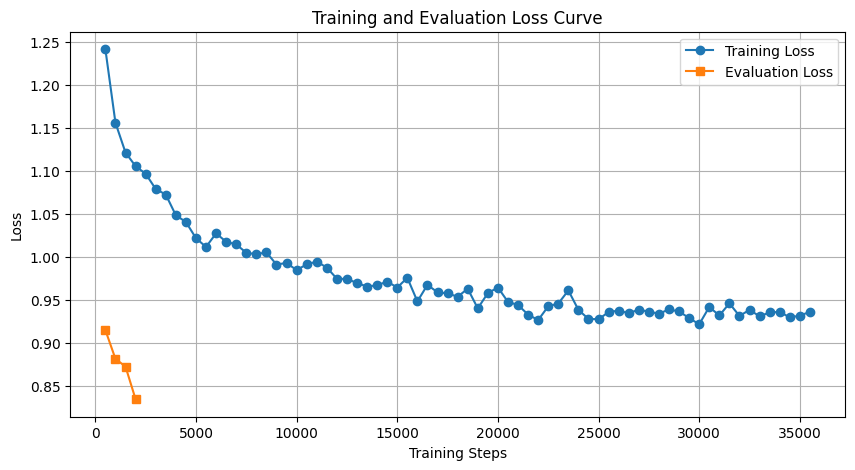

In [15]:
# Plotting Graph (Training Loss, Evaluation Loss)
import matplotlib.pyplot as plt

def plot_training_metrics(trainer):
    """
    Plots training loss and evaluation loss from Trainer's log history.
    """
    # Extract loss values from trainer logs
    log_history = trainer.state.log_history

    # Separate training loss and evaluation loss
    steps = []
    train_losses = []
    eval_losses = []

    for entry in log_history:
        if "loss" in entry:
            train_losses.append(entry["loss"])
            steps.append(entry["step"])
        if "eval_loss" in entry:
            eval_losses.append(entry["eval_loss"])

    # Plot Training and Evaluation Loss
    plt.figure(figsize=(10, 5))
    plt.plot(steps[:len(train_losses)], train_losses, label="Training Loss", marker="o")
    if eval_losses:
        plt.plot(steps[:len(eval_losses)], eval_losses, label="Evaluation Loss", marker="s")

    plt.xlabel("Training Steps")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_metrics(trainer)


In [16]:
# Make Predictions
generate_predictions(model, tokenizer, "What are the symptoms of diabetes?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.85` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `40` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


'Hi, dairy have gone through your question. I can understand your concern. You are having diabetes. It is a type of diabetes and it is very common in diabetic patients. So you need to take treatment accordingly. Hope I have answered your question, if you have doubt then I will be happy to answer. Thanks for using Chat Doctor. Wish you a very good health.'

---
### Phase 3: 
- Deploy the fine-tuned model as a RAG application.
- Gradio Interface as a front-end, for Client Interaction

In [21]:
# Deploy the Model
qa_bot = deploy_fine_tuned_model()

 Loading fine-tuned model for deployment...
Model and tokenizer loaded!
 Loading FAISS Embeddings...
 Computing embeddings for FAISS...
 FAISS index saved successfully!
 Loading FAISS Vector Store...
 Model deployed successfully! Ready to chat.


### Gradio interface

In [26]:
import gradio as gr

def gradio_interface():
    """
    Launches a Gradio-based interface for the Medical QA Bot.

    This function initializes and deploys a fine-tuned T5-based chatbot using Gradio.
    It allows users to input medical-related questions and receive AI-generated responses.

    The function performs the following steps:
    1. Deploys the fine-tuned model via `deploy_fine_tuned_model()`.
    2. Defines a chat function that takes user input and retrieves model responses.
    3. Creates an interactive Gradio UI with a text input and output box.
    4. Launches the Gradio interface with a public link.

    Returns:
        None: The function launches the Gradio interface and does not return a value.
    
    Example:
        To start the chatbot UI, simply call:
        
        >>> gradio_interface()
        
        This will display an interactive web UI where users can input medical queries.
    """

    # Deploy the fine-tuned model (loads the `qa_bot` function)
    qa_bot = deploy_fine_tuned_model()

    # Define Gradio function to interact with the bot
    def chat_function(user_input):
        """
        Generates a response from the fine-tuned model based on user input.

        Args:
            user_input (str): The medical question entered by the user.

        Returns:
            str: The chatbot-generated response.
        """
        response = qa_bot(user_input)
        return response

    # Create Gradio UI
    interface = gr.Interface(
        fn=chat_function,  # Function to call
        inputs=gr.Textbox(lines=2, placeholder="Enter your medical question..."),
        outputs=gr.Textbox(),
        title=" Medical ChatBot (T5 Fine-Tuned)",
        description="Ask medical-related questions and get answers from the fine-tuned T5 model!",
        theme="default"
    )

    # Launch the UI
    interface.launch(share=True)  # Use `share=True` to get a public link
# start the Gradio UI
gradio_interface()


 Loading fine-tuned model for deployment...
Model and tokenizer loaded!
 Loading FAISS Embeddings...
 Computing embeddings for FAISS...
 FAISS index saved successfully!
 Loading FAISS Vector Store...
 Model deployed successfully! Ready to chat.
* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://835321b1700545cada.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.85` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `40` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarn